# Final project

**Due Friday, June 12.**

Harrison Newman


### Checklist

Before submitting, make sure that your project

- Introduces a computational topic or method  
- Provides background: what kind of problem is this meant to solve?  
- Explains the topic/method: how does it work (in words and possibly in equations, as appropriate)?  
- Provides an example application: if the project is focused on a particular type of problem, where is this problem encountered? If it is focused on a method, in what situations is the method useful?  
- Is similar in depth to one of our shorter homework assignments (e.g., homework 2)  

For the text description, you should feel free to expand on your midterm mini-project. Note that the final **must** include a worked example in Python. For examples of how to do this, look back to the Jupyter notebooks accompanying each lecture from the course. I'd strongly encourage you to not just plot your results at the end, but also to show intermediate results along the way. Here's a (very in depth!) [example](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html) using [support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine) for classification, to show a different style of organization.

And as always, make sure to

- Fill in your name above  
- Cite any resources that you used while working on this assignment

Mountain Bike performance analysis

For this project, the first idea that I thought of was to use classical mechanics and computational methods together to analyze my performance on a mountain bike. There are GPS/heartrate monitors available for purchase that I can attach to the bike (and myself) to gather data including:

heartrate
speed
distance
cadence (pedalling frequency)
elevation (i think/hope)
Various things are needed to help figure out the forces acting on the bike, including:

frictional force (based on how fast I lose speed on different terrains when not pedalling)

drag force (but would only apply at higher speeds, possibly not relevant)

the angle of certain hills/trails (could probably be found using a function with data from the GPS)

moment of inertias for the wheels

Several things that I aim to yield:

An approximate 2D version of the terrain I rode over, as a graph, such that you can easily visualize the actual hill
An approximation of the energy being exerted by me personally, as I both push my body to the limit and casually ride to the corner store

A way to increase performance via maximization of energy output (by me) and speed increase

A way for other people to do the same (if it hasn't already been done, which it might've)

I feel this could be useful for anyone interested in mountainbiking or possibly even regular hiking or running, and could be useful for maximizing the person's potential while doing those activities. I would need to use the lagrangian, some integration methods (depending on which one works best and appears the most accurate), and a lot of graphing to accomplish all of these goals. I would also need to buy and figure out how to import data from the gps/heartrate monitor, but it's a little difficult to shop lately.

--- This was my midterm ---

Now unfortunately, there are a few things I hadn't taken into account when I made this mid-term report. For one, I did not consider the fact that if I change gears while riding, it will vastly alter my heartrate much further than my cadence would. For two, I did not consider that using my brakes when going downhill (which is necessary in some places if you like staying alive and healthy) would alter my speed. Lastly, I did not consider how long it would actually take me to get one of those darn heartrate monitors!

This has caused a few problems that I will list below:

1. I can't really correlate my heartrate or my cadence to anything useful, at this point I'm not sure why an average person would be interested in that information, as it seems quite frivolous. It's very difficult to approximate energy output with heartrate and my cadence is completely unrelated because of switching gears. I may try a 1-gear ride and upload the results.

2. I can't correlate my speed to potential energy, because my speed is artifically slowed down by braking. Perhaps I can approximate the amount of force being applied by the brakes, but I would need to use other forms of data analysis to analyse that data. Sounds FUN!!! I may be able to do a ride with no brakes in order to get around this problem.

3. I did not have more than a week to get enough rides in to test and use this program. On the second day I was doing friction testing, and my chain/derailer had a catastrophic problem. 

4. I have literally no idea what I'm doing, pretty much any of the time, you know what I mean?

So anyways, I am now going to try doing some programming stuff. Most likely, I will be able to form a 2D map, I will be able to approximate frictional force, I will be able to approximate my kinetic energy, and I will be able to approximate the energy I'm using. I may be able to use a potential energy graph, but it would solely be based on GPS coordinates and I would absolutely need to do several miniature "test rides" to try and approximate frictional force to avoid significant error. I believe if I do about 10 rides and use an RNG approximation on different surface materials, then I should be able to find an average frictional force that's somewhat more accurate than doing one single test.
I should also note: I will probably have several different values for my approximate work done, sourced from different data types. This may mean I can use RNG stuff to approximate it more accurately, or it may mean I'll just have several wildly incorrect forms of my energy exerted data. 

In [0]:
## import stuff as necessary
import numpy as np
import random as rng
import seaborn as sns

## first things first
## define constants

mass_total = 84.549618        ## kilograms, approximate
mass_body = 71.486158         
mass_bike = mass_total - mass_body
mass_frame = 7.302837             
mass_tire_front = 2.54012             
mass_tire_back = 3.22051           
g = 9.80655                 ## gravitational constant, m/s**2
pi = np.pi                  ## constant
wheel_radius = 0.381        ## meters
wheel_circumference = 0.381 * 2 * pi
wheel_front_MOI = mass_tire_front * (wheel_radius ** 2) ## approximated as a hoop, most of 
                            ## the mass is in the outer rim, tire, and tube anyhow
wheel_back_MOI = mass_tire_back * (wheel_radius ** 2)

second things second

approximate drag

In order to do this, I made multiple smaller rides on different materials.

First I did asphalt, then concrete, then my chain broke. :)
All was done at relatively flat places on beautiful UCR campus on 6/10/2020. I assume this class doesn't care about importing data from files, so I'm mostly .going to copy paste data as it seems massively inconvenient and complicated.

By approximating "drag", I am to include friction, air resistance, etc into one constant force factor that I will be able to use rather than actually trying to figure out each individual component force, because I don't think I have the equipment or testing materials necessary to do such a thing.

## Also, I used this website to convert all of the .fit files into .csv files
## http://garmin.kiesewetter.nl/
## I definitely don't think it's very safe, LMAO

In [61]:
asphalt_positions1 = [24.3, 28.25, 32.89, 35.58, 40.67, 42.74, 45.42, 47.96, 50.36,
                       51.98, 54.63, 56.52]
asphalt_positions2 = [18.08, 23.28, 28.82, 33.32, 38.53, 43.13, 48.86, 53.45, 58.9, 
                      64.64, 68.38, 72.95, 77.1, 80.63, 83.07, 87.08, 92.22, 94.93, 
                      97.02, 100.5, 103.16, 106.5, 108.14, 109.28, 112.11, 114]
asphalt_positions3 = [7.12, 13.25, 18.64, 22.59, 28.55, 31.18, 35.06, 38.61, 42.17, 
                      45.6, 48.23, 50.98, 53.4, 56.03, 58.21, 60.68, 62.8, 66.31, 
                      68.93, 71.06, 72.22]
asphalt_positions4 = [13.18, 18.18, 20.06, 23.97, 28.57, 31.4, 33.71, 36.01, 38.31, 
                      41.51, 43.04]
asphalt_positions5 = [2.86,	5.72,	10.79, 16.88, 23.1, 27.92, 33.59, 39.19, 43.63, 
                      48.59, 52.81,	56.99, 63.44,	68.25, 72.54,	76.48, 80.53,	83.6,	
                      87.97, 90.6, 95.55,	99.49, 102.76, 106.44, 111.83, 113.68, 
                      117.8, 120.43, 123.23, 125.14, 130.52, 132.06, 134.68, 136.6,
                      138.87,	141.17]
asphalt_positions6 = [2.54,	8.15,	14.53,	21.92,	27.61,	31.55,	35.71,	41.6,	46.8,
                      50.25,	54.12,	57.38,	61.04,	65.64,	69.32,	71.62,	74.25,
                      77.31,	80.05,	81.36,	84.57,	87.42,	89.46,	90.61]

asphalt_velocities1 = [4.6, 4.426, 3.936, 3.74, 3.354, 3.227, 2.955, 2.82, 2.689,
                       2.498, 2.28, 2.271]
asphalt_velocities2 = [5.483, 5.407, 5.219, 5.112, 5.076, 5.071, 4.946, 4.843, 4.749, 
                       4.694, 4.585, 4.368, 4.24, 4.093, 3.958, 3.718, 3.53, 3.359, 
                       3.214, 2.962, 2.869, 2.677, 2.537, 2.437, 2.293, 1.986]
asphalt_velocities3 = [5.726, 5.547, 5.015, 4.804, 4.374, 4.237, 3.872, 3.638, 
                       3.429, 3.073, 2.94, 2.763, 2.548, 2.397, 2.359, 2.362, 
                       2.364, 2.41, 2.449, 2.492, 2.542]
asphalt_velocities4 = [3.898, 3.733, 3.665, 3.537, 3.39, 3.185, 2.963, 2.818, 2.694, 
                       2.449, 2.302]
asphalt_velocities5 = [5.74,	5.634,	5.485,	5.412,	5.346,	5.248,	5.151,	5.057,
                       4.922,	4.889,	4.773,	4.693,	4.547,	4.446,	4.358,	4.278,
                       4.193,	4.137,	4.02,	3.975,	3.86,	3.79,	3.716,	3.647,	3.546,
                       3.541,	3.501,	3.423,	3.2,	3.088,	2.868,	2.742,	2.581,	2.392,
                       2.298,	2.215]                       
asphalt_velocities6 = [6.226,	6.121,	5.869,	5.682,	5.344,	5.21,	4.969,	4.724,
                       4.538,	4.382,	4.111,	3.949,	3.71,	3.556,	3.421,	3.259,
                       3.035,	2.855,	2.741,	2.64,	2.405,	2.299,	2.191,	2.082]

concrete_positions1 = [15.98,	21.43,	28.6,	33.2,	38.92,	43.52,	48.13,
                       52.73,	57.4,	62.92,	67.17,	70.24,	75.65,	79.33,	83.49,
                       85.79,	89.53,	91.06,	96.06,	97.9,	102.94,	104.78,	107.05,
                       109.35,	111.65,	113.94,	117, 118.56,	119.71,	121, 125.14,
                       127.72,	128.87,	130.21,	132.24,	132.24,	132.24,]
concrete_positions2 = [21.37,	28.18,	34.31,	40.45,	49.06,	56.41,	61.52,	
                       66.79,	73.89,	79.56,	85.68,	91.78,	96.34,	100.29,	
                       104.12,	107.19,	111.09,	117.22,	121.26,	124.71,	127.5,	
                       130.27,	134.87,	139.27,	141.57,	143.87,	146.17,	148.75,	
                       151.44,	153.54,	157.97,	159.78,	160.93,	162.41,	164.95,	
                       166.65,	167.8,	169.19,	171.5,	174.32,	176.4,	177.55,	
                       178.96,	180.12,	180.12,	180.12,	180.12,	180.12]
concrete_positions3 = [9.25,	15.22,	20.71,	24.47,	27.87,	31.76,	34.87,	39.74,
                       43.61,	46.24,	48.4,	51.09,	53.56,	57.04,	60.64,	62.59,
                       63.74,	66.25,	68.61,	69.75,	70.68,	70.68,	70.68]
concrete_positions4 = [14.37,	18.92,	23.52,	28.03,	31.69,	36.07,	42.64,	46.04,
                       49.48,	53.27,	57.04,	60.52,	63.94,	67.45,	72.03,	76.16,
                       78.56,	82.28,	84.91,	87.43,	89.73,	92.3,	95.23,	98.06,
                       100.89,	103,	104.01,	105.54,	109.63,	112.22,	113.37,	114.52,
                       115.67,	116.28,	116.28,	116.28,	116.28,	116.28]
concrete_positions5 = [10.67,	17.86,	24.19,	30.49,	35.78,	42.01,	47.28,	
                       55.78,	60.39,	64.99,	70.28,	74.54,	78.08,	83.2,	87.15,	92.6]
concrete_positions6 = [8.83,	14.74,	20.26,	27.44,	34.01,	38.54,	43.27,	47.87,
                       52.47,	57.07,	61.79,	67.05,	70.82,	73.51,	75.79,	80.73,	84.7,
                       87.5,	89.33,	92.97,	96.02,	98.32,	100.66,	103.31,	105.97,	108.7,
                       111.49,	112.93,	114.21,	115.35,	119.95,	122.1,	123.35,	124.37,	125.39,
                       126.7,	128.47,	131.14,	133.45,	134.52,	134.52,	134.52]

concrete_velocities1 = [5.876,	5.82,	5.556,	5.487,	5.263,	5.175,	5.088,
                        5, 4.896,	4.577, 4.421,	4.275,	4.181,	4.09,	3.79,	3.667,
                        3.351,	3.295,	3.132,	3.024,	2.8,	2.716,	2.647,	2.58,	2.493,
                        2.406,	2.272,	2.205,	2.148,	2.083,	1.921,	1.859,	1.813,
                        1.769,	1.483,	0.974,	0.464,]
concrete_velocities2 = [7.472,	7.246,	6.922,	6.849,	6.568,	6.371,	6.108,	
                        5.98,	5.852,	5.885,	5.858,	5.56,	5.188,	4.786,	4.503,
                        4.349,	4.123,	4.041,	3.891,	3.723,	3.594,	3.46,	3.265,
                        3.188,	3.108,	3.028,	2.945,	2.839,	2.701,	2.634,	2.504,
                        2.377,	2.312,	2.228,	2.1,	2.03,	1.991,	1.951,	1.902,
                        1.79,	1.673,	1.637,	1.58,	1.446,	1.08,	0.714,	0.348,	0]
concrete_velocities3 = [5, 4.647, 4.517,4.372,	4.253,	3.989,	3.832,	3.627,	
                        3.54,	3.327,	3.191,	3.026,	2.891,	2.771,	2.648,	2.529,
                        2.45,	2.348,	2.241,	2.122,	1.927,	1.415,	0.904]
concrete_velocities4 = [5.272,	5.105,	4.927,	4.789,	4.637,	4.484,	4.314,	4.209,
                        4.101,	3.971,	3.843,	3.723,	3.625,	3.52,	3.416,	3.322,
                        3.241,	3.191,	3.163,	3.107,	2.996,	2.824,	2.682,	2.623,
                        2.565,	2.479,	2.352,	2.201,	2.038,	1.965,	1.92,	1.871,
                        1.817,	1.577,	1.126,	0.675,	0.223,	0]
concrete_velocities5 = [6.91,	6.854,	6.636,	6.396,	6.263,	5.963,	5.806,	5.57,
                        5.438,	5.272,	5.123,	4.962,	4.799,	4.513,	4.38,	3.984]
concrete_velocities6 = [5.917,	5.89,	5.722,	5.578,	5.504,	5.348,	5.191,
                        4.944,	4.782,	4.423,	4.307,	4.217,	4.184,	3.974,	3.771,
                        3.517,	3.399,	3.227,	3.131,	2.985,	2.907,	2.81,	2.717,
                        2.652,	2.586,	2.485,	2.355,	2.279,	2.213,	2.177,	2.044,
                        1.93,	1.849,	1.807,	1.765,	1.717,	1.657,	1.593,	1.559,
                        1.288,	0.809,	0.331]                                              

## Above is raw data
## I then create 24 empty lists (not all at one time) and created a delta function
## In order to populate my lists with appropriate delta values

dx1 = []
dx2 = []
dx3 = []
dx4 = []
dx5 = []
dx6 = []

def delta_finder(mylist1, mylist2):
  pos_ini = mylist1[0]
  for i in mylist1[1:]:
    pos_fin = i
    mylist2.append(pos_fin - pos_ini)
    pos_ini = pos_fin
  return(mylist2)

delta_finder(asphalt_positions1, dx1)
delta_finder(asphalt_positions2, dx2)
delta_finder(asphalt_positions3, dx3)
delta_finder(asphalt_positions4, dx4)
delta_finder(asphalt_positions5, dx5)
delta_finder(asphalt_positions6, dx6)

dv1 = []
dv2 = []
dv3 = []
dv4 = []
dv5 = []
dv6 = []

delta_finder(asphalt_velocities1, dv1)
delta_finder(asphalt_velocities2, dv2)
delta_finder(asphalt_velocities3, dv3)
delta_finder(asphalt_velocities4, dv4)
delta_finder(asphalt_velocities5, dv5)
delta_finder(asphalt_velocities6, dv6)

dx7 = []
dx8 = []
dx9 = []
dx10 = []
dx11 = []
dx12 = []

delta_finder(concrete_positions1, dx7)
delta_finder(concrete_positions2, dx8)
delta_finder(concrete_positions3, dx9)
delta_finder(concrete_positions4, dx10)
delta_finder(concrete_positions5, dx11)
delta_finder(concrete_positions6, dx12)

dv7 = []
dv8 = []
dv9 = []
dv10 = []
dv11 = []
dv12 = []

delta_finder(concrete_velocities1, dv7)
delta_finder(concrete_velocities2, dv8)
delta_finder(concrete_velocities3, dv9)
delta_finder(concrete_velocities4, dv10)
delta_finder(concrete_velocities5, dv11)
delta_finder(concrete_velocities6, dv12)

print(dx1)
print(dx2)
print(dx3)
print(dx4)
print(dx5)
print(dx6)
print(dx7)
print(dx8)
print(dx9)
print(dx10)
print(dx11)
print(dx12)

print(dv1)
print(dv2)
print(dv3)
print(dv4)
print(dv5)
print(dv6)
print(dv7)
print(dv8)
print(dv9)
print(dv10)
print(dv11)
print(dv12)

[3.9499999999999993, 4.640000000000001, 2.6899999999999977, 5.090000000000003, 2.0700000000000003, 2.6799999999999997, 2.539999999999999, 2.3999999999999986, 1.6199999999999974, 2.6500000000000057, 1.8900000000000006]
[5.200000000000003, 5.539999999999999, 4.5, 5.210000000000001, 4.600000000000001, 5.729999999999997, 4.590000000000003, 5.449999999999996, 5.740000000000002, 3.739999999999995, 4.570000000000007, 4.1499999999999915, 3.530000000000001, 2.4399999999999977, 4.010000000000005, 5.140000000000001, 2.710000000000008, 2.089999999999989, 3.480000000000004, 2.6599999999999966, 3.3400000000000034, 1.6400000000000006, 1.1400000000000006, 2.8299999999999983, 1.8900000000000006]
[6.13, 5.390000000000001, 3.9499999999999993, 5.960000000000001, 2.629999999999999, 3.8800000000000026, 3.549999999999997, 3.5600000000000023, 3.4299999999999997, 2.6299999999999955, 2.75, 2.4200000000000017, 2.6300000000000026, 2.1799999999999997, 2.469999999999999, 2.1199999999999974, 3.510000000000005, 2.620

In [62]:
## Okay, so now I have 24 lists, and I only think I need 12 of them. 
## I believe the formula F = ma easily applies here, or, F = m * dv
## And thus, I created a force function to accompany my delta function

forces1 = []
forces2 = []
forces3 = []
forces4 = []
forces5 = []
forces6 = []
forces7 = []
forces8 = []
forces9 = []
forces10 = []
forces11 = []
forces12 = []

def force_finder(mylist1, mylist2):
  for i in mylist1:
    force = mass_total * i
    mylist2.append(force)
  return(mylist2)

force_finder(dv1, forces1)
force_finder(dv2, forces2)
force_finder(dv3, forces3)
force_finder(dv4, forces4)
force_finder(dv5, forces5)
force_finder(dv6, forces6)
force_finder(dv7, forces7)
force_finder(dv8, forces8)
force_finder(dv9, forces9)
force_finder(dv10, forces10)
force_finder(dv11, forces11)
force_finder(dv12, forces12)

print(forces1)
print(forces2)
print(forces3)
print(forces4)
print(forces5)
print(forces6)
print(forces7)
print(forces8)
print(forces9)
print(forces10)
print(forces11)
print(forces12)

## now that I have these lists, I can do statistical analyses on them for RNG related purposes

forces1_avg = np.sum(forces1) / len(forces1)
forces2_avg = np.sum(forces2) / len(forces2)
forces3_avg = np.sum(forces3) / len(forces3)
forces4_avg = np.sum(forces4) / len(forces4)
forces5_avg = np.sum(forces5) / len(forces5)
forces6_avg = np.sum(forces6) / len(forces6)
forces7_avg = np.sum(forces7) / len(forces7)
forces8_avg = np.sum(forces8) / len(forces8)
forces9_avg = np.sum(forces9) / len(forces9)
forces10_avg = np.sum(forces10) / len(forces10)
forces11_avg = np.sum(forces11) / len(forces11)
forces12_avg = np.sum(forces12) / len(forces12)

forces1_std = np.std(forces1)
forces2_std = np.std(forces2)
forces3_std = np.std(forces3)
forces4_std = np.std(forces4)
forces5_std = np.std(forces5)
forces6_std = np.std(forces6)
forces7_std = np.std(forces7)
forces8_std = np.std(forces8)
forces9_std = np.std(forces9)
forces10_std = np.std(forces10)
forces11_std = np.std(forces11)
forces12_std = np.std(forces12)

print(forces1_avg, forces2_avg, forces3_avg, forces4_avg, forces5_avg, forces6_avg, forces7_avg,
      forces8_avg, forces9_avg, forces10_avg, forces11_avg, forces12_avg)
print(forces1_std, forces2_std, forces3_std, forces4_std, forces5_std, forces6_std, forces7_std,
      forces8_std, forces9_std, forces10_std, forces11_std, forces12_std)

[-14.711633531999956, -41.429312820000014, -16.571725127999976, -32.636152548000005, -10.737801486000018, -22.99749609599998, -11.414198430000019, -11.075999957999981, -16.148977037999984, -18.431816724000033, -0.7609465619999912]
[-6.425770967999968, -15.895328183999975, -9.046809126000017, -3.04378624800004, -0.422748089999991, -10.56870225, -8.70861065399998, -7.947664092000025, -4.650228989999976, -9.215908361999999, -18.34726710599997, -10.82235110400001, -12.42879384600002, -11.414198429999981, -20.291908320000015, -15.895328184000013, -14.457984677999983, -12.25969461, -21.30650373599998, -7.863114473999997, -16.233526656000013, -11.83694652000001, -8.454961800000007, -12.175144991999973, -25.956732726000013]
[-15.134381622000022, -44.980396776, -17.839969397999948, -36.35633574000005, -11.583297665999963, -30.860610570000016, -19.784610611999998, -17.670870162000007, -30.099664007999987, -11.245099194, -14.965282386000004, -18.17816786999999, -12.76699231800002, -3.212885483999

In [63]:
## Now, in order to better approximate the values, I will use RNG and
## the avg and std's i found in order to find a very average average
## lol

def average_finder(average, standard_deviation):
  values = []
  range = 2 * standard_deviation
  iterations = 1000
  counter = 0
  while counter < 1000000:
    counter += 1
    num = (rng.random() * 2) - 1
    value = num * range
    values.append(value + average)
  return(np.sum(values) / len(values))

better_avg_1 = average_finder(forces1_avg, forces1_std)
print(better_avg_1)
better_avg_2 = average_finder(forces2_avg, forces2_std)
print(better_avg_2)
better_avg_3 = average_finder(forces1_avg, forces3_std)
print(better_avg_3)
better_avg_4 = average_finder(forces4_avg, forces4_std)
print(better_avg_4)
better_avg_5 = average_finder(forces5_avg, forces5_std)
print(better_avg_5)
better_avg_6 = average_finder(forces6_avg, forces6_std)
print(better_avg_6)
better_avg_7 = average_finder(forces7_avg, forces7_std)
print(better_avg_7)
better_avg_8 = average_finder(forces8_avg, forces8_std)
print(better_avg_8)
better_avg_9 = average_finder(forces9_avg, forces9_std)
print(better_avg_9)
better_avg_10 = average_finder(forces10_avg, forces10_std)
print(better_avg_10)
better_avg_11 = average_finder(forces11_avg, forces11_std)
print(better_avg_11)
better_avg_12 = average_finder(forces12_avg, forces12_std)
print(better_avg_12)

## And then I'll do this to the collection of averages that are wildly different
better_avg_list1 = [better_avg_1, better_avg_2, better_avg_3, better_avg_4, better_avg_5, better_avg_6]
better_avg_list2 = [better_avg_7, better_avg_8, better_avg_9, better_avg_10, better_avg_11, better_avg_12]

better_avg_avg1 = np.sum(better_avg_list1) / len(better_avg_list1)
better_avg_avg2 = np.sum(better_avg_list2) / len(better_avg_list2)
better_avg_std1 = np.std(better_avg_list1)
better_avg_std2 = np.std(better_avg_list2)

final_avg_asphalt = average_finder(better_avg_avg1, better_avg_std1)
final_avg_concrete = average_finder(better_avg_avg2, better_avg_std2)

print(final_avg_asphalt, final_avg_concrete)

-17.902229319461984
-11.839486379338885
-17.926021336222206
-13.496828640046441
-8.511516497219016
-15.23625203868927
-12.715607345965665
-13.440000862206073
-15.753624740073295
-12.056577937595303
-16.488657335482877
-11.504944353759972
-14.156545953967893 -13.656780389623655


In [0]:
## Now that I have an average force value, I can multiply these by dx (either incrementally
## or the total value) in order to find the total energy in joules. 

def energy_loss_finder(mylist1, myavg1, mylist2):
  for i in mylist1:
    energy_loss = i * myavg1
    mylist2.append(energy_loss)
  return(mylist2)

## However, applying this to all 12 dx functions above would be a bit pointless,
## because those were just short test rides and aren't really very interesting.

## Now I can also define kinetic energy and gravitational potential energy functions
## I also found it appropriate to define momentum, for both me and the tires

def kinetic_energy_finder(mylist1, mylist2):
  for i in mylist1[:-1]:
    kinetic_energy = 0.5 * mass_total * (i ** 2)
    mylist2.append(kinetic_energy)
  return(mylist2)

def gravitational_potential_finder(mylist1, mylist2):
  for i in mylist1[:-1]:
    potential = i * 9.8 * mass_total
    mylist2.append(potential)
  return(mylist2)

def momentum_finder(mylist1, mylist2):
  for i in mylist1[:-1]:
    momentum = i * mass_total
    mylist2.append(momentum)
  return(mylist2)

def angular_momentum_finder(mylist1, mylist2, MOI):
  for i in mylist1[:-1]:
    angular_momentum = MOI * i / wheel_circumference
    mylist2.append(angular_momentum)
  return(mylist2)

## Since any resistance from the tires should be encapsulated in the drag portion
## I should be able to only modify this potential energy by the approximate angle of the
## hills I'm on.

def angle_finder(myheightlist, mydistancelist, mynewlist):
  counter = 0
  for i in myheightlist:
    theta = np.tan( i / mydistancelist[counter])
    mynewlist.append(theta)
    counter += 1
  return(mynewlist)

def gravitational_potential_vectorizer(myPotentialList, myAngleList, myNewX, myNewY):
  counter = 0
  for i in myPotentialList:
    y = i * np.cos(myAngleList[counter])
    x = i * np.sin(myAngleList[counter])
    counter += 1
    myNewX.append(x)
    myNewY.append(y)
  return(myNewX, myNewY)

## At this point, I now have a kinetic energy function, a mock-drag function, and
## a potential energy function for both the X and Y directions. This means that I
## can better evaluate what part of potential energy contributes towards my momentum
## and what part is just part of the drag (and therefore ignorable, i.e. the y)

Pretty much at this point I think I need to start graphing and using real data in order to make sure any of this is correct or even reasonable. I believe everything has been coded properly, and I should be able to make reasonable Kinetic Energy over time graphs as well as Potential Energy over time graphs.

I haven't stated it yet, but each data point is exactly 1 second a part, so creating an array that will hold the appropriate data is very simple. I can also do Kinetic energy over distance and potential energy over distance graphs, but I don't think it would be much different (besides being possibly less correct). 

I also am not sure if I could do much to smooth out the curve, as I don't have any better data in between these points. I believe I will just have to live with what I get. I don't believe I can use this data to explicitly find out anything about my personal energy usage, because a lot of the kinetic energy is just carried over from momentum. 

However, when going uphill, I should be able to use both friction and potential energy to approximate how much energy I'm using. It's just simply true that when going downhill, any biker is using almost no energy, even if they're pedalling. Most velocity just comes from gravitational potential energy. 

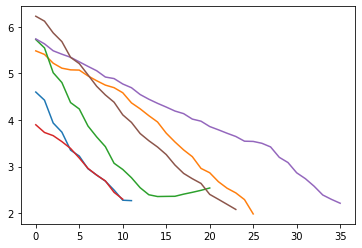

In [65]:
## Here I will define a function that graphs things with time as the x-axis and
## whatever I want to look at is the y-axis

def simple_plot_func(myYvalues):
  x_len = len(myYvalues)
  myTimes = np.arange(0, x_len, 1)
  return(sns.lineplot(myTimes, myYvalues))

simple_plot_func(asphalt_velocities1)
simple_plot_func(asphalt_velocities2)
simple_plot_func(asphalt_velocities3)
simple_plot_func(asphalt_velocities4)
simple_plot_func(asphalt_velocities5)
simple_plot_func(asphalt_velocities6)


## These are all six velocity vs time graphs for the asphalt velocities
## This can easily be altered to show all 12, the other 6, or whatever else


In [0]:
## Here I will import more data from a ride in order to use it with the functions above

altitude_list_1 = [527.6,	527.8,	527.8,	528,	528.2,	528.2,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.6,	528.6,	528.6,	528.6,	528.6,	528.8,	528.8,	528.8,	528.8,	528.8,	528.8,	529,	529,	529.2,	529.2,	529.4,	529.6,	529.6,	529.6,	529.6,	529.6,	529.8,	529.8,	529.8,	529.8,	529.8,	530,	530,	530.2,	530.2,	530.4,	530.4,	530.6,	530.6,	530.8,	531,	531,	531.2,	531.4,	531.4,	531.6,	531.8,	532,	532.2,	532.4,	532.6,	532.8,	533,	533.2,	533.4,	533.6,	533.8,	534,	534.2,	534.4,	534.6,	534.6,	534.8,	535,	535.2,	535.4,	535.6,	535.8,	536.2,	536.4,	536.8,	537,	537.2,	537.4,	537.6,	538,	538.2,	538.4,	538.8,	539,	539.2,	539.4,	539.6,	539.8,	540,	540.2,	540.4,	540.6,	540.8,	541,	541.2,	541.4,	541.6,	541.8,	542,	542.2,	542.2,	542.4,	542.4,	542.6,	542.6,	542.8,	542.8,	543,	543,	543,	543.2,	543.2,	543.4,	543.4,	543.4,	543.6,	543.6,	543.6,	543.8,	543.8,	543.8,	543.8,	543.8,	543.8,	543.8,	544,	544.2,	544.2,	544.4,	544.4,	544.6,	544.6,	544.6,	544.8,	544.8,	545,	545,	545,	545.2,	545.2,	545.2,	545.2,	545.2,	545.2,	545.2,	545.2,	545.2,	545,	545,	544.8,	544.8,	544.6,	544.6,	544.6,	544.4,	544.4,	544.2,	544,	544,	543.8,	543.8,	543.6,	543.6,	543.6,	543.4,	543.4,	543.4,	543.4,	543.6,	543.6,	543.6,	543.6,	543.8,	543.8,	544,	544,	544,	544.2,	544.2,	544.4,	544.4,	544.4,	544.6,	544.6,	544.8,	544.8,	544.8,	545,	545,	545,	545.2,	545.2,	545.4,	545.4,	545.4,	545.6,	545.6,	545.8,	545.8,	546,	546,	546,	546.2,	546.2,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.4,	546.6,	546.6,	546.6,	546.6,	546.6,	546.4,	546.4,	546.6,	546.6,	546.6,	546.8,	546.8,	546.8,	547,	547,	547,	547,	547,	547,	547,	546.8,	546.8,	546.6,	546.4,	546.4,	546.2,	546.2,	546,	546,	546,	546,	546,	545.8,	545.8,	545.8,	545.8,	545.8,	545.6,	545.6,	545.6,	545.6,	545.4,	545.4,	545.4,	545.4,	545.4,	545.2,	545.2,	545,	545,	545,	544.8,	544.8,	544.8,	544.6,	544.6,	544.4,	544.2,	544,	543.8,	543.4,	543.2,	542.8,	542.4,	542,	541.6,	541.4,	541,	540.4,	540,	539.4,	538.8,	538.2,	537.8,	537,	536.4,	535.8,	535.2,	534.8,	534.4,	533.8,	533.4,	533.2,	532.8,	532.4,	532.2,	531.8,	531.6,	531.4,	531.2,	531,	530.8,	530.8,	530.6,	530.6,	530.6,	530.6,	530.6,	530.4,	530.6,	530.6,	530.6,	530.6,	530.4,	530.4,	530.4,	530.4,	530.4,	530.2,	530.2,	530,	529.8,	529.6,	529.6,	529.4,	529.2,	529.2,	529,	528.8,	528.8,	528.6,	528.6,	528.6,	528.6,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.4,	528.2,	528.2,	528.2,	528,	528,	528,	527.8,	527.8,	527.8,	527.8,	527.8,	527.8,	527.8,	527.8,	527.8,	527.8,	527.8,	527.8,	527.6,	527.6,	527.6,	527.4,	527.4,	527.2,	527.2,	527.2,	527.2,	527.2,	527.2,	527.2,	527.2,	527.2,	527.2,	527.2,	527.2,	527,	527.2,	527.2,	527.2,	527.2,	527.2,	527.2,	527,	527,	526.8,	526.6,	526.4,	526.2,	525.8,	525.4,	525,	524.6,	524.2,	523.6,	523.2,	522.6,	522.2,	521.8,	521.4,	521.2,	520.8,	520.6,	520.4,	520.2,	520,	519.8,	519.6,	519.6,	519.4,	519.2,	519,	518.8,	518.8,	518.6,	518.4,	518.4,	518.2,	518.2,	518.2,	518,	518,	517.8,	517.8,	517.8,	517.8,	517.8,	517.8,	517.8,	517.8,	517.8,	518,	518,	518.2,	518.4,	518.6,	518.8,	519,	519.2,	519.4,	519.6,	519.8,	520,	520.2,	520.4,	520.6,	520.8,	521,	521.2,	521.4,	521.6,	521.8,	522,	522.2,	522.2,	522.4,	522.6,	522.8,	523]
distance_list_1 = [5.31,	9.57,	12.09,	16.16,	20.49,	24.55,	28.97,	33.38,	37.79,	42.19,	46.56,	51.98,	55.61,	60.94,	66.1,	70.79,	75.21,	79.61,	83.8,	88.45,	92.64,	98.41,	101.7,	107.22,	110.74,	113.9,	119.06,	123.33,	126.27,	131.45,	134.98,	140.2,	143.14,	148.08,	152.49,	156.64,	160.39,	165.73,	170.14,	174.55,	178.96,	183.37,	187.78,	192.19,	196.61,	201.02,	205.43,	210.72,	214.27,	219.51,	223.06,	228.57,	233,	237.7,	240.97,	245.94,	249.48,	253.96,	258.79,	263.57,	267.03,	270.19,	273.83,	278.99,	282.43,	285.61,	289.04,	292.23,	295.87,	299.25,	302.48,	305.88,	310.18,	312.87,	316.88,	320.62,	323.56,	327.52,	331.27,	334.55,	338.94,	341.46,	345.55,	348.07,	352.3,	356.2,	359.52,	362.81,	366.1,	369.4,	374.15,	376.67,	379.95,	383.03,	385.9,	389.24,	392.56,	394.7,	398.33,	400.83,	404.98,	407.5,	410.94,	413.89,	418.18,	420.71,	424.78,	427.3,	431.39,	433.91,	437.3,	439.87,	442.41,	444.93,	449.01,	451.53,	455.04,	457.96,	460.92,	462.8,	466.61,	469.06,	473.23,	475.72,	479.29,	482.19,	485.9,	488.78,	493.95,	497.34,	501.25,	504.11,	508.15,	512.7,	516.73,	519.67,	523.34,	526.28,	531.45,	534.97,	538.06,	541.51,	545.36,	548.3,	553.5,	557.03,	560.77,	563.71,	567.77,	570.35,	575.55,	579.08,	582.78,	585.72,	590.92,	594.5,	598.19,	601.14,	606.4,	609.94,	613.59,	616.58,	621.83,	625.4,	629.81,	634.23,	638.26,	642.01,	647.37,	651.85,	656.25,	660.64,	665.06,	669.31,	673.17,	678.27,	681.69,	685.74,	690.1,	694.63,	698.91,	702.57,	706.96,	711.12,	714.33,	718.07,	721.4,	724.73,	729.13,	734.64,	738.57,	741.92,	746.16,	750.7,	753.97,	759.3,	763.19,	767.75,	771.63,	774.88,	778.17,	782.11,	785.21,	789.75,	793.53,	796.93,	800.27,	805.17,	808.96,	813.04,	816.03,	820.62,	824.41,	828.49,	832.91,	837.29,	840.23,	843.9,	846.83,	851.67,	856.08,	861.6,	866.01,	870.42,	874.77,	879.25,	883.63,	888.06,	892.41,	897.1,	902.91,	908.63,	912.57,	917.82,	921.38,	925.18,	928.12,	934.02,	936.85,	942.11,	945.65,	949.46,	952.39,	957.24,	961.02,	966.28,	968.05,	971.93,	976.35,	979.73,	985.02,	991.77,	996.18,	1001.98,	1009.04,	1014.89,	1022.25,	1030.65,	1037.71,	1046.08,	1053.14,	1059.02,	1066.36,	1072.5,	1079.72,	1087,	1092.87,	1097.63,	1102.66,	1109.65,	1114.89,	1118.98,	1125.93,	1130.29,	1135,	1141.37,	1146.1,	1154.66,	1159.5,	1165.74,	1170.65,	1175.91,	1181.8,	1187.13,	1192.31,	1197.7,	1203.37,	1208.16,	1213.34,	1219.28,	1224.44,	1231.78,	1237.66,	1245.29,	1251.62,	1258.75,	1266.5,	1274.49,	1282.08,	1290.91,	1299.84,	1308.74,	1317.62,	1327.7,	1337.58,	1346.47,	1358.55,	1370.17,	1378.49,	1389.03,	1399.22,	1410.58,	1422.58,	1433.01,	1442.84,	1451.71,	1462.37,	1471.85,	1480.92,	1489.67,	1498.9,	1507.87,	1515.78,	1523.62,	1534.77,	1540.68,	1548.29,	1555.87,	1561.73,	1567.16,	1572.74,	1577.21,	1582.79,	1586.51,	1591.51,	1595.44,	1598.65,	1600.59,	1604.45,	1606.99,	1611.14,	1613.68,	1616.72,	1620.02,	1625.25,	1628.86,	1634.31,	1637.7,	1643.99,	1646.83,	1651.08,	1655.55,	1661.44,	1666.52,	1672.25,	1675.83,	1681.18,	1684.75,	1688.58,	1691.57,	1696.52,	1700.35,	1705.15,	1708.48,	1712.23,	1714.02,	1719.15,	1722.73,	1726.51,	1729.49,	1733.53,	1737.27,	1740.28,	1742.9,	1748.19,	1751.78,	1756.23,	1760.7,	1766.68,	1769.73,	1774.42,	1777.78,	1781.15,	1784.51,	1789.03,	1794.35,	1798.84,	1803.2,	1807,	1812.28,	1816.7,	1821.11,	1825.7,	1830.01,	1834.6,	1841.15,	1844.4,	1850.42,	1855.36,	1860.11,	1864.49,	1869.18,	1874.28,	1879.46,	1883.94,	1888.21,	1892.61,	1898.49,	1902.51,	1906.35,	1912.41,	1917.53,	1922.01,	1926.48,	1932.5,	1939.06,	1945.59,	1952.53,	1959.99,	1966.41,	1973.79,	1980.66,	1988.54,	1997.53,	2006.37,	2015.59,	2024.43,	2033.57,	2042.56,	2051.51,	2060.52,	2067.95,	2074.72,	2083.02,	2091.98,	2100.99,	2108.81,	2115.44,	2122.06,	2130.24,	2137.77,	2143.64,	2151.13,	2157.14,	2166.22,	2173.63,	2179.41,	2186.53,	2193.8,	2199.91,	2205.68,	2213.55,	2220.6,	2225.23,	2231.8,	2239.62,	2244.02,	2249.78,	2253.4,	2258.77,	2263.27,	2267.77,	2274.96,	2280.08,	2284.57,	2289.07,	2293.55,	2298.04,	2302.53,	2306.53,	2309.53,	2314.8,	2318.4,	2323.45,	2327.32,	2332.73,	2336.32,	2340.71,	2345.21,	2349.39,	2353.14,	2357.86,	2363.13,	2366.28,	2369.98,	2373.74,	2376.75,	2379.89,	2383.5,	2385.76,	2388.02]
heartrate_list_1 = [145,	145,	145,	145,	144,	144,	143,	142,	141,	141,	141,	142,	141,	142,	141,	141,	140,	139,	138,	138,	137,	137,	137,	137,	137,	137,	137,	137,	137,	137,	137,	137,	137,	137,	137,	137,	138,	138,	138,	138,	138,	139,	140,	140,	141,	141,	142,	142,	142,	142,	141,	141,	142,	142,	141,	141,	140,	140,	140,	140,	140,	141,	141,	142,	142,	143,	144,	144,	144,	145,	147,	147,	149,	150,	150,	151,	152,	153,	153,	154,	155,	155,	155,	156,	156,	156,	156,	155,	156,	156,	156,	156,	156,	156,	156,	157,	157,	157,	157,	157,	157,	157,	157,	157,	157,	156,	156,	156,	157,	158,	159,	160,	161,	161,	161,	162,	162,	162,	162,	161,	161,	160,	160,	160,	160,	161,	161,	160,	160,	159,	159,	158,	158,	157,	156,	156,	155,	152,	151,	150,	149,	147,	146,	144,	144,	144,	144,	143,	143,	142,	140,	140,	138,	138,	138,	138,	138,	138,	139,	139,	139,	139,	140,	141,	142,	143,	144,	144,	144,	144,	143,	142,	141,	141,	140,	139,	139,	139,	139,	139,	140,	140,	141,	141,	142,	142,	143,	143,	143,	143,	143,	142,	141,	140,	139,	138,	138,	138,	138,	139,	139,	139,	140,	140,	142,	142,	143,	144,	144,	145,	145,	146,	146,	147,	147,	148,	148,	149,	150,	150,	150,	149,	149,	149,	149,	149,	149,	149,	149,	150,	150,	150,	150,	150,	150,	151,	151,	152,	152,	151,	150,	149,	149,	148,	148,	147,	146,	145,	144,	143,	142,	141,	141,	140,	140,	139,	140,	140,	140,	139,	139,	137,	137,	136,	135,	134,	133,	132,	132,	132,	131,	131,	130,	129,	128,	126,	124,	120,	119,	119,	120,	121,	122,	122,	122,	122,	121,	121,	121,	121,	121,	121,	119,	119,	119,	119,	118,	118,	118,	118,	117,	117,	117,	118,	121,	124,	129,	131,	133,	134,	136,	136,	137,	137,	137,	139,	142,	144,	146,	147,	147,	147,	147,	147,	147,	148,	150,	152,	154,	154,	153,	153,	152,	151,	151,	150,	149,	148,	148,	147,	146,	145,	143,	143,	142,	142,	142,	142,	141,	140,	139,	137,	135,	134,	132,	130,	128,	125,	125,	125,	125,	125,	125,	124,	124,	123,	123,	123,	123,	123,	123,	123,	123,	124,	124,	125,	125,	125,	125,	125,	124,	124,	124,	124,	124,	125,	125,	125,	125,	125,	125,	125,	125,	126,	127,	128,	128,	128,	128,	128,	127,	127,	127,	127,	127,	127,	127,	127,	127,	127,	127,	127,	127,	127,	126,	126,	127,	129,	131,	132,	133,	133,	132,	132,	130,	129,	125,	125,	125,	125,	125,	125,	125,	123,	119,	118,	116,	116,	117,	117,	117,	117,	116,	115,	114,	114,	113,	113,	113,	114,	115,	117,	119,	120,	121,	122,	122,	122,	123,	123,	123,	124,	125,	126,	126,	127,	128,	130,	131,	131,	132,	132,	133,	134,	134,	135,	136,	137,	137,	137,	137,	139,	139,	140,	141,	142,	142,	144,	144,	145,	145]
cadence_list_1 = [67,	71,	74,	77,	77,	79,	80,	81,	82,	82,	85,	86,	87,	87,	91,	90,	88,	85,	83,	82,	81,	80,	80,	79,	78,	78,	78,	78,	79,	78,	78,	78,	80,	80,	81,	81,	81,	82,	83,	82,	83,	83,	82,	83,	84,	86,	85,	86,	86,	85,	85,	87,	87,	86,	80,	77,	74,	74,	74,	73,	73,	72,	71,	70,	69,	67,	66,	66,	67,	66,	65,	66,	65,	65,	67,	68,	68,	69,	68,	68,	69,	68,	67,	65,	65,	65,	65,	64,	63,	62,	60,	59,	58,	58,	56,	57,	57,	58,	58,	59,	60,	59,	60,	63,	64,	64,	63,	63,	61,	60,	58,	57,	55,	55,	56,	56,	57,	56,	55,	53,	54,	55,	57,	60,	60,	62,	63,	67,	67,	68,	70,	72,	72,	73,	71,	70,	70,	68,	70,	69,	68,	68,	69,	69,	70,	69,	69,	71,	71,	71,	70,	73,	70,	72,	71,	72,	73,	72,	72,	72,	73,	75,	75,	75,	75,	78,	79,	81,	81,	83,	83,	83,	84,	84,	82,	78,	80,	74,	67,	70,	75,	77,	78,	76,	72,	70,	68,	74,	77,	79,	80,	77,	75,	74,	73,	72,	70,	69,	69,	68,	68,	69,	69,	69,	70,	71,	72,	73,	73,	74,	74,	75,	76,	76,	77,	78,	78,	80,	83,	83,	83,	83,	84,	84,	85,	85,	86,	85,	85,	85,	85,	84,	85,	84,	83,	81,	80,	77,	77,	75,	73,	72,	70,	69,	66,	66,	60,	47,	56,	65,	69,	48,	26,	5,	59,	40,	22,	3,	0,	0,	0,	0,	32,	68,	56,	38,	20,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	14,	53,	68,	49,	30,	11,	96,	79,	48,	65,	67,	57,	50,	42,	39,	41,	43,	46,	62,	68,	66,	65,	63,	67,	73,	76,	70,	60,	51,	41,	43,	46,	52,	55,	64,	67,	74,	72,	64,	44,	24,	3,	0,	0,	0,	0,	37,	78,	85,	82,	79,	76,	70,	66,	67,	66,	64,	65,	66,	65,	66,	66,	67,	68,	72,	74,	74,	75,	75,	76,	76,	75,	75,	75,	76,	77,	78,	80,	83,	83,	83,	83,	84,	84,	84,	85,	85,	85,	85,	88,	86,	85,	85,	84,	85,	84,	85,	87,	88,	89,	88,	77,	55,	33,	11,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	10,	27,	44,	61,	71,	55,	44,	41,	40,	44,	44,	44,	35,	24,	13,	2,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	41,	92,	89,	88,	86,	86,	86,	87,	86,	86,	84,	82,	82,	82,	81,	80,	81,	81,	80,	81,	80,	80,	78,	76,	74,	73,	71,	70,	70,	68,	62,	54,	47,	39,	28]
speed_list_1 = [3.413,	3.618,	3.705,	3.881,	3.99,	4.097,	4.131,	4.219,	4.271,	4.378,	4.417,	4.482,	4.543,	4.667,	4.724,	4.702,	4.655,	4.585,	4.509,	4.393,	4.373,	4.303,	4.262,	4.204,	4.194,	4.163,	4.153,	4.14,	4.14,	4.17,	4.151,	4.134,	4.153,	4.214,	4.241,	4.297,	4.327,	4.36,	4.352,	4.35,	4.36,	4.375,	4.38,	4.401,	4.427,	4.5,	4.522,	4.563,	4.558,	4.507,	4.509,	4.589,	4.646,	4.703,	4.596,	4.302,	4.155,	4.024,	3.978,	3.925,	3.899,	3.849,	3.826,	3.771,	3.718,	3.632,	3.573,	3.528,	3.507,	3.498,	3.494,	3.495,	3.477,	3.477,	3.491,	3.529,	3.558,	3.606,	3.603,	3.606,	3.606,	3.588,	3.536,	3.525,	3.495,	3.465,	3.445,	3.433,	3.392,	3.348,	3.28,	3.226,	3.126,	3.082,	3.042,	3.015,	3.009,	3.016,	3.047,	3.059,	3.112,	3.125,	3.154,	3.211,	3.302,	3.319,	3.349,	3.336,	3.278,	3.245,	3.161,	3.111,	3.058,	3.001,	2.951,	2.963,	3.004,	3.015,	2.984,	2.958,	2.953,	2.97,	3.063,	3.116,	3.174,	3.178,	3.265,	3.32,	3.473,	3.518,	3.63,	3.676,	3.73,	3.789,	3.799,	3.766,	3.748,	3.744,	3.722,	3.7,	3.672,	3.655,	3.635,	3.629,	3.659,	3.689,	3.708,	3.714,	3.75,	3.75,	3.737,	3.737,	3.752,	3.759,	3.794,	3.789,	3.789,	3.805,	3.836,	3.839,	3.862,	3.888,	3.946,	3.973,	3.998,	4.024,	4.119,	4.164,	4.269,	4.31,	4.398,	4.438,	4.444,	4.444,	4.414,	4.362,	4.307,	4.217,	4.201,	4.25,	4.266,	4.222,	4.161,	4.119,	4.019,	3.84,	3.774,	3.784,	3.863,	4.094,	4.115,	4.135,	4.105,	4.016,	3.937,	3.871,	3.813,	3.746,	3.704,	3.667,	3.651,	3.644,	3.645,	3.677,	3.698,	3.732,	3.764,	3.826,	3.846,	3.868,	3.88,	3.956,	3.972,	4.018,	4.047,	4.109,	4.133,	4.205,	4.238,	4.327,	4.356,	4.418,	4.438,	4.471,	4.481,	4.49,	4.498,	4.526,	4.528,	4.533,	4.521,	4.523,	4.526,	4.497,	4.434,	4.365,	4.325,	4.229,	4.195,	4.049,	4.004,	3.929,	3.892,	3.775,	3.735,	3.578,	3.583,	3.772,	3.909,	4.178,	4.362,	5.025,	5.386,	5.803,	6.118,	6.478,	6.657,	7.299,	7.548,	7.448,	7.372,	7.212,	7.152,	6.804,	6.547,	6.13,	5.996,	5.847,	5.754,	5.685,	5.624,	5.593,	5.543,	5.457,	5.441,	5.426,	5.452,	5.451,	5.434,	5.415,	5.414,	5.387,	5.414,	5.395,	5.369,	5.37,	5.349,	5.313,	5.353,	5.472,	5.575,	6.014,	6.128,	6.536,	6.793,	7.064,	7.261,	7.621,	8.007,	8.285,	8.668,	8.872,	9.483,	9.709,	9.986,	10.085,	10.11,	10.083,	10.27,	10.354,	10.636,	10.636,	10.668,	10.503,	9.938,	9.595,	9.347,	9.169,	8.964,	8.841,	8.755,	8.599,	8.892,	8.643,	8.185,	7.895,	7.205,	6.84,	6.272,	5.973,	5.482,	5.22,	4.691,	4.457,	4.295,	3.99,	3.561,	3.267,	2.893,	2.907,	3.023,	3.106,	3.273,	3.483,	3.931,	4.06,	4.377,	4.444,	4.584,	4.618,	4.694,	4.739,	4.809,	4.837,	4.576,	4.576,	4.533,	4.417,	4.21,	4.105,	3.879,	3.808,	3.624,	3.583,	3.539,	3.543,	3.541,	3.518,	3.525,	3.535,	3.642,	3.722,	3.825,	3.94,	4.052,	4.068,	4.069,	4.071,	4.079,	4.078,	4.08,	4.086,	4.092,	4.099,	4.29,	4.354,	4.407,	4.438,	4.463,	4.479,	4.492,	4.491,	4.528,	4.552,	4.575,	4.598,	4.636,	4.636,	4.627,	4.609,	4.596,	4.588,	4.595,	4.621,	4.662,	4.683,	4.719,	4.806,	4.835,	4.829,	4.764,	4.759,	4.979,	5.345,	5.616,	5.9,	6.286,	6.736,	7.016,	7.273,	7.376,	7.531,	7.79,	8.225,	8.467,	8.604,	8.709,	8.713,	8.606,	8.483,	8.455,	8.332,	8.165,	7.975,	7.903,	7.646,	7.569,	7.465,	7.36,	7.25,	7.162,	7.104,	7.044,	7.012,	6.928,	6.807,	6.745,	6.684,	6.688,	6.622,	6.557,	6.671,	6.775,	6.826,	6.526,	5.882,	5.637,	5.139,	5.043,	4.82,	4.747,	4.684,	4.692,	4.664,	4.662,	4.634,	4.598,	4.493,	4.459,	4.416,	4.392,	4.366,	4.311,	4.331,	4.334,	4.328,	4.325,	4.314,	4.303,	4.212,	4.148,	4.053,	3.939,	3.866,	3.812,	3.749,	3.673,	3.402,	3.221,	2.993,	2.763]

## This is all raw data taken from a ride around my neighborhood on 6/12/2020


In [67]:
## First I can create the initial delta functions necessary

my_delta_x = []
my_delta_v = []
my_delta_h = []

## altitude is a little bit too large so for simplicity I will cut it down such
## that the lowest value is my lowest altitude during the ride
altitude_list_1_amend = []
cutoff = min(altitude_list_1)
for i in altitude_list_1:
  new_alt = i - cutoff
  altitude_list_1_amend.append(new_alt)


delta_finder(distance_list_1, my_delta_x)
delta_finder(speed_list_1, my_delta_v)
delta_finder(altitude_list_1, my_delta_h)

## note that this doesn't matter for delta_h but will be important for things like
## potential energy

print(my_delta_x)
print(my_delta_v)
print(my_delta_h)
print(altitude_list_1_amend)

[4.260000000000001, 2.5199999999999996, 4.07, 4.329999999999998, 4.060000000000002, 4.419999999999998, 4.410000000000004, 4.409999999999997, 4.399999999999999, 4.3700000000000045, 5.419999999999995, 3.6300000000000026, 5.329999999999998, 5.159999999999997, 4.690000000000012, 4.4199999999999875, 4.400000000000006, 4.189999999999998, 4.650000000000006, 4.189999999999998, 5.769999999999996, 3.2900000000000063, 5.519999999999996, 3.519999999999996, 3.160000000000011, 5.159999999999997, 4.269999999999996, 2.9399999999999977, 5.179999999999993, 3.530000000000001, 5.219999999999999, 2.9399999999999977, 4.940000000000026, 4.409999999999997, 4.149999999999977, 3.75, 5.340000000000003, 4.409999999999997, 4.410000000000025, 4.409999999999997, 4.409999999999997, 4.409999999999997, 4.409999999999997, 4.420000000000016, 4.409999999999997, 4.409999999999997, 5.289999999999992, 3.5500000000000114, 5.239999999999981, 3.5500000000000114, 5.509999999999991, 4.430000000000007, 4.699999999999989, 3.2700000

In [68]:
## I already have an approximation of frictional force, so that can come into effect later
## What I can do now is create lists with all of those values I made before

my_energy_loss_1 = []
my_kinetic_energy_1 = []
my_potential_energy_1 = []
my_x_potential_1 = []
my_y_potential_1 = []
my_momentum_1 = []
my_angular_momentum_front = []
my_angular_momentum_back = []
my_angles_1 = []

energy_loss_finder(my_delta_x, -15, my_energy_loss_1) ## -15 for simplicity
kinetic_energy_finder(speed_list_1, my_kinetic_energy_1)
gravitational_potential_finder(altitude_list_1_amend, my_potential_energy_1)
momentum_finder(speed_list_1, my_momentum_1)
angular_momentum_finder(speed_list_1, my_angular_momentum_back, wheel_back_MOI)
angular_momentum_finder(speed_list_1, my_angular_momentum_front, wheel_front_MOI)
angle_finder(my_delta_h, my_delta_x, my_angles_1)
gravitational_potential_vectorizer(my_potential_energy_1, my_angles_1, my_x_potential_1,
                                   my_y_potential_1)

print(len(my_energy_loss_1))
print(len(my_kinetic_energy_1))
print(len(my_potential_energy_1))
print(len(my_momentum_1))
print(len(my_angular_momentum_front))
print(len(my_angular_momentum_back))
print(len(my_angles_1))
print(len(my_x_potential_1))
print(len(my_y_potential_1))

print(my_energy_loss_1)
print(my_kinetic_energy_1)
print(my_potential_energy_1)
print(my_momentum_1)
print(my_angular_momentum_front)
print(my_angular_momentum_back)
print(my_angles_1)
print(my_x_potential_1)
print(my_y_potential_1)

## I had to do some slight debugging to get rid of a problem with the lengths being different


490
490
490
490
490
490
490
490
490
[-63.90000000000001, -37.8, -61.050000000000004, -64.94999999999997, -60.900000000000034, -66.29999999999997, -66.15000000000006, -66.14999999999995, -65.99999999999997, -65.55000000000007, -81.29999999999993, -54.45000000000004, -79.94999999999997, -77.39999999999995, -70.35000000000018, -66.29999999999981, -66.00000000000009, -62.849999999999966, -69.75000000000009, -62.849999999999966, -86.54999999999994, -49.350000000000094, -82.79999999999994, -52.79999999999994, -47.40000000000016, -77.39999999999995, -64.04999999999994, -44.099999999999966, -77.69999999999989, -52.95000000000002, -78.29999999999998, -44.099999999999966, -74.10000000000039, -66.14999999999995, -62.24999999999966, -56.25, -80.10000000000005, -66.14999999999995, -66.15000000000038, -66.14999999999995, -66.14999999999995, -66.14999999999995, -66.14999999999995, -66.30000000000024, -66.14999999999995, -66.14999999999995, -79.34999999999988, -53.25000000000017, -78.59999999999971, -

Here's some graphs

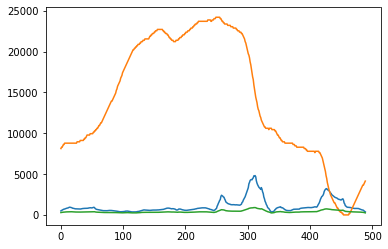

In [69]:
## my KE, PE, and momentum vs time

simple_plot_func(my_kinetic_energy_1) ## blue
simple_plot_func(my_potential_energy_1) ## orange
simple_plot_func(my_momentum_1) ## green

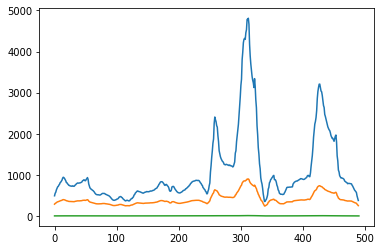

In [70]:
## my KE, momentum, and velocity vs time

simple_plot_func(my_kinetic_energy_1)
simple_plot_func(my_momentum_1)
simple_plot_func(speed_list_1)


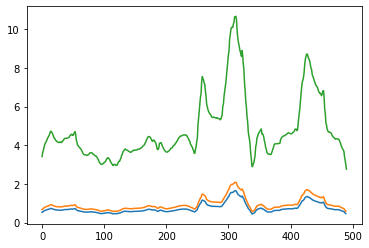

In [71]:
## angular momentum and velocity versus time
## It is much easier to see the relation of velocity here than in the other graphs

simple_plot_func(my_angular_momentum_front)
simple_plot_func(my_angular_momentum_back)
simple_plot_func(speed_list_1)

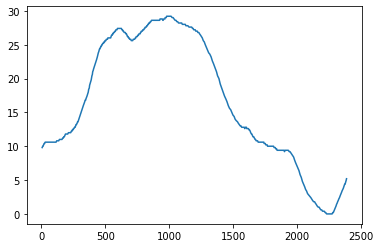

In [72]:
## 2D version of the what i rode

sns.lineplot(distance_list_1, altitude_list_1_amend)

I'm pretty sure there's more things I can do with this, but honestly with all the trouble I had, I didn't have very much time to finish everything or do as much thinking as i had wanted.

I am definitely going to save this and I am most likely going to continue working on it in the future when I have a much better fumnctioning bike, more time, and more coding experience.

Thank you for assigning this project as it led me towards an ambition I would likely never have undertaken, and it was very much an enjoyable experience. I hope you enjoyed my wild ride of a project.